# Guacamole Index

## Requirements

### Libraries

In [58]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from datetime import timedelta


# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from highlight_text import HighlightText, ax_text, fig_text

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

### Custom functions

In [3]:
# Filter dataframe by date range or for two specific dates
def date_selection(data_frame,first_date,last_date,inbewtween):
    if inbewtween==True:
        data_frame = data_frame[(data_frame["date"] >= first_date) & (data_frame["date"] <= last_date)].reset_index(drop = True)
    else:
        data_frame = data_frame[(data_frame["date"] == first_date) | (data_frame["date"] == last_date)].reset_index(drop = True)
    return(data_frame)


In [18]:
#n Load new fonts
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

## Data

### Guacamole Data

#### Payload

In [4]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "product"
    ],
    "categories": {
        "product": [
            "02b414002b0923d",
            "b146318fe51b95c",
            "64967d83ac5aa6d",
            "83b09ec629dc758",
            "e4f91a6cd3bb389",
            "91f000d00e522da",
            "0e92d6a5900b8f1"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_inpc_product_biweekly", #mex_inegi_inpc_product_monthly
            "variables": [
                "c572db59b8cd109"
            ]
        },
    ],
    "from": "1999-01-01"
}

guac = get_tukan_api_request(payload)
guac_data = guac["data"]
guac_data

Success getting the data


,date,product__ref,product,c572db59b8cd109
0,1999-01-01,02b414002b0923d,Aguacates,18.701610
1,1999-01-01,0e92d6a5900b8f1,Concentrados de pollo y sal,33.074411
2,1999-01-01,64967d83ac5aa6d,Jitomates,78.576624
3,1999-01-01,83b09ec629dc758,Cebollas,60.123922
4,1999-01-01,91f000d00e522da,Limones,34.725954
...,...,...,...,...
3873,2022-01-15,64967d83ac5aa6d,Jitomates,110.131000
3874,2022-01-15,83b09ec629dc758,Cebollas,202.306000
3875,2022-01-15,91f000d00e522da,Limones,406.326000
3876,2022-01-15,b146318fe51b95c,Tortillas de maíz,128.260000


#### Guacamole Index

In [8]:
weights = pd.DataFrame(data={'product__ref': ['02b414002b0923d','83b09ec629dc758','e4f91a6cd3bb389','64967d83ac5aa6d','91f000d00e522da','0e92d6a5900b8f1','b146318fe51b95c'], 'weight': [.425,.125,.0125,.1875,.0875,.00625,.15625]})
guac_index_data = pd.merge(guac_data,weights, on='product__ref')

#Index
guac_index = pd.DataFrame(guac_index_data.groupby(guac_index_data.date).apply(lambda x: np.average(x.c572db59b8cd109, weights=x.weight)))
guac_index.reset_index(inplace=True)
guac_index.rename(columns={0:'guacamole_index'},inplace=True)

#Yearly var
guac_index['guac_yoy'] = guac_index['guacamole_index'].shift(24)
guac_index['guac_yoy'] = (guac_index['guacamole_index']/guac_index['guac_yoy'])-1

guac_index

,date,guacamole_index,guac_yoy
0,1999-01-01,37.988966,NaN
1,1999-01-15,38.876947,NaN
2,1999-02-01,38.001455,NaN
3,1999-02-15,36.427476,NaN
4,1999-03-01,34.830555,NaN
...,...,...,...
549,2021-11-15,147.545988,0.311751
550,2021-12-01,145.373656,0.394675
551,2021-12-15,147.418956,0.461070
552,2022-01-01,154.030544,0.532261


#### Lemonless Guacamole  Index

In [9]:
weights_lemonless = pd.DataFrame(data={'product__ref': ['02b414002b0923d','83b09ec629dc758','e4f91a6cd3bb389','64967d83ac5aa6d','91f000d00e522da','0e92d6a5900b8f1','b146318fe51b95c'], 'weight': [.4658,.1370,.0137,.2055,0,.0068,.1712]})
guac_lemonless_index_data = pd.merge(guac_data,weights_lemonless, on='product__ref')

# Index
guac_lemonless_index = pd.DataFrame(guac_lemonless_index_data.groupby(guac_lemonless_index_data.date).apply(lambda x: np.average(x.c572db59b8cd109, weights=x.weight)))
guac_lemonless_index.reset_index(inplace=True)
guac_lemonless_index.rename(columns={0:'guacamole_lemonless_index'},inplace=True)

#Yearly var
guac_lemonless_index['lemonless_yoy'] = guac_lemonless_index['guacamole_lemonless_index'].shift(24)
guac_lemonless_index['lemonless_yoy'] = (guac_lemonless_index['guacamole_lemonless_index']/guac_lemonless_index['lemonless_yoy'])-1

guac_lemonless_index

,date,guacamole_lemonless_index,lemonless_yoy
0,1999-01-01,38.302746,NaN
1,1999-01-15,38.096006,NaN
2,1999-02-01,35.864063,NaN
3,1999-02-15,33.515152,NaN
4,1999-03-01,32.086846,NaN
...,...,...,...
549,2021-11-15,146.485001,0.320610
550,2021-12-01,140.987141,0.371870
551,2021-12-15,136.406850,0.375590
552,2022-01-01,134.386743,0.373542


#### Guacamole Indexes

In [10]:
guacamole_indexes = pd.merge(guac_index, guac_lemonless_index)
guacamole_indexes

,date,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,1999-01-01,37.988966,NaN,38.302746,NaN
1,1999-01-15,38.876947,NaN,38.096006,NaN
2,1999-02-01,38.001455,NaN,35.864063,NaN
3,1999-02-15,36.427476,NaN,33.515152,NaN
4,1999-03-01,34.830555,NaN,32.086846,NaN
...,...,...,...,...,...
549,2021-11-15,147.545988,0.311751,146.485001,0.320610
550,2021-12-01,145.373656,0.394675,140.987141,0.371870
551,2021-12-15,147.418956,0.461070,136.406850,0.375590
552,2022-01-01,154.030544,0.532261,134.386743,0.373542


### CPI Data

#### Payload

In [11]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "product"
    ],
    "categories": {
        "product": [
            "193b800af2978be"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_inpc_product_biweekly",
            "variables": [
                "c572db59b8cd109"
            ]
        }
    ],
    "from": "1999-01-10"
}

cpi = get_tukan_api_request(payload)
cpi_data = cpi["data"]
cpi_data.drop(columns=['product__ref','product'],inplace=True)
cpi_data.rename(columns={'c572db59b8cd109':'cpi'},inplace=True)
cpi_data

Success getting the data


,date,cpi
0,1999-01-01,40.294042
1,1999-01-15,40.645518
2,1999-02-01,40.927675
3,1999-02-15,41.099610
4,1999-03-01,41.295943
...,...,...
549,2021-11-15,117.184000
550,2021-12-01,117.301000
551,2021-12-15,117.314000
552,2022-01-01,117.770000


## Plots

### Final data

In [12]:
final_data = pd.merge(cpi_data, guacamole_indexes)
final_data = date_selection(final_data,'2000-01-01','2022-01-15',inbewtween=True)
final_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2000-01-01,44.809270,34.481462,-0.092330,29.664835,-0.225517
1,2000-01-15,45.052246,32.737729,-0.157914,28.008979,-0.264779
2,2000-02-01,45.272547,31.650707,-0.167119,26.991978,-0.247381
3,2000-02-15,45.386070,31.020865,-0.148421,26.424939,-0.211552
4,2000-03-01,45.530449,29.997859,-0.138749,26.188723,-0.183817
...,...,...,...,...,...,...
525,2021-11-15,117.184000,147.545988,0.311751,146.485001,0.320610
526,2021-12-01,117.301000,145.373656,0.394675,140.987141,0.371870
527,2021-12-15,117.314000,147.418956,0.461070,136.406850,0.375590
528,2022-01-01,117.770000,154.030544,0.532261,134.386743,0.373542


In [70]:
156.924263/final_data[final_data['date']=='2019-01-15']["guacamole_index"]

457    1.343919
Name: guacamole_index, dtype: float64

In [15]:
# Avocado data
avocado_data = guac_data[guac_data['product__ref']=='02b414002b0923d']
avocado_data = date_selection(avocado_data,'2000-01-01','2022-01-15',inbewtween=True)

# Lemon data
lemon_data = guac_data[guac_data['product__ref']=='91f000d00e522da']
lemon_data = date_selection(lemon_data,'2000-01-01','2022-01-15',inbewtween=True)

### Guacamole Index

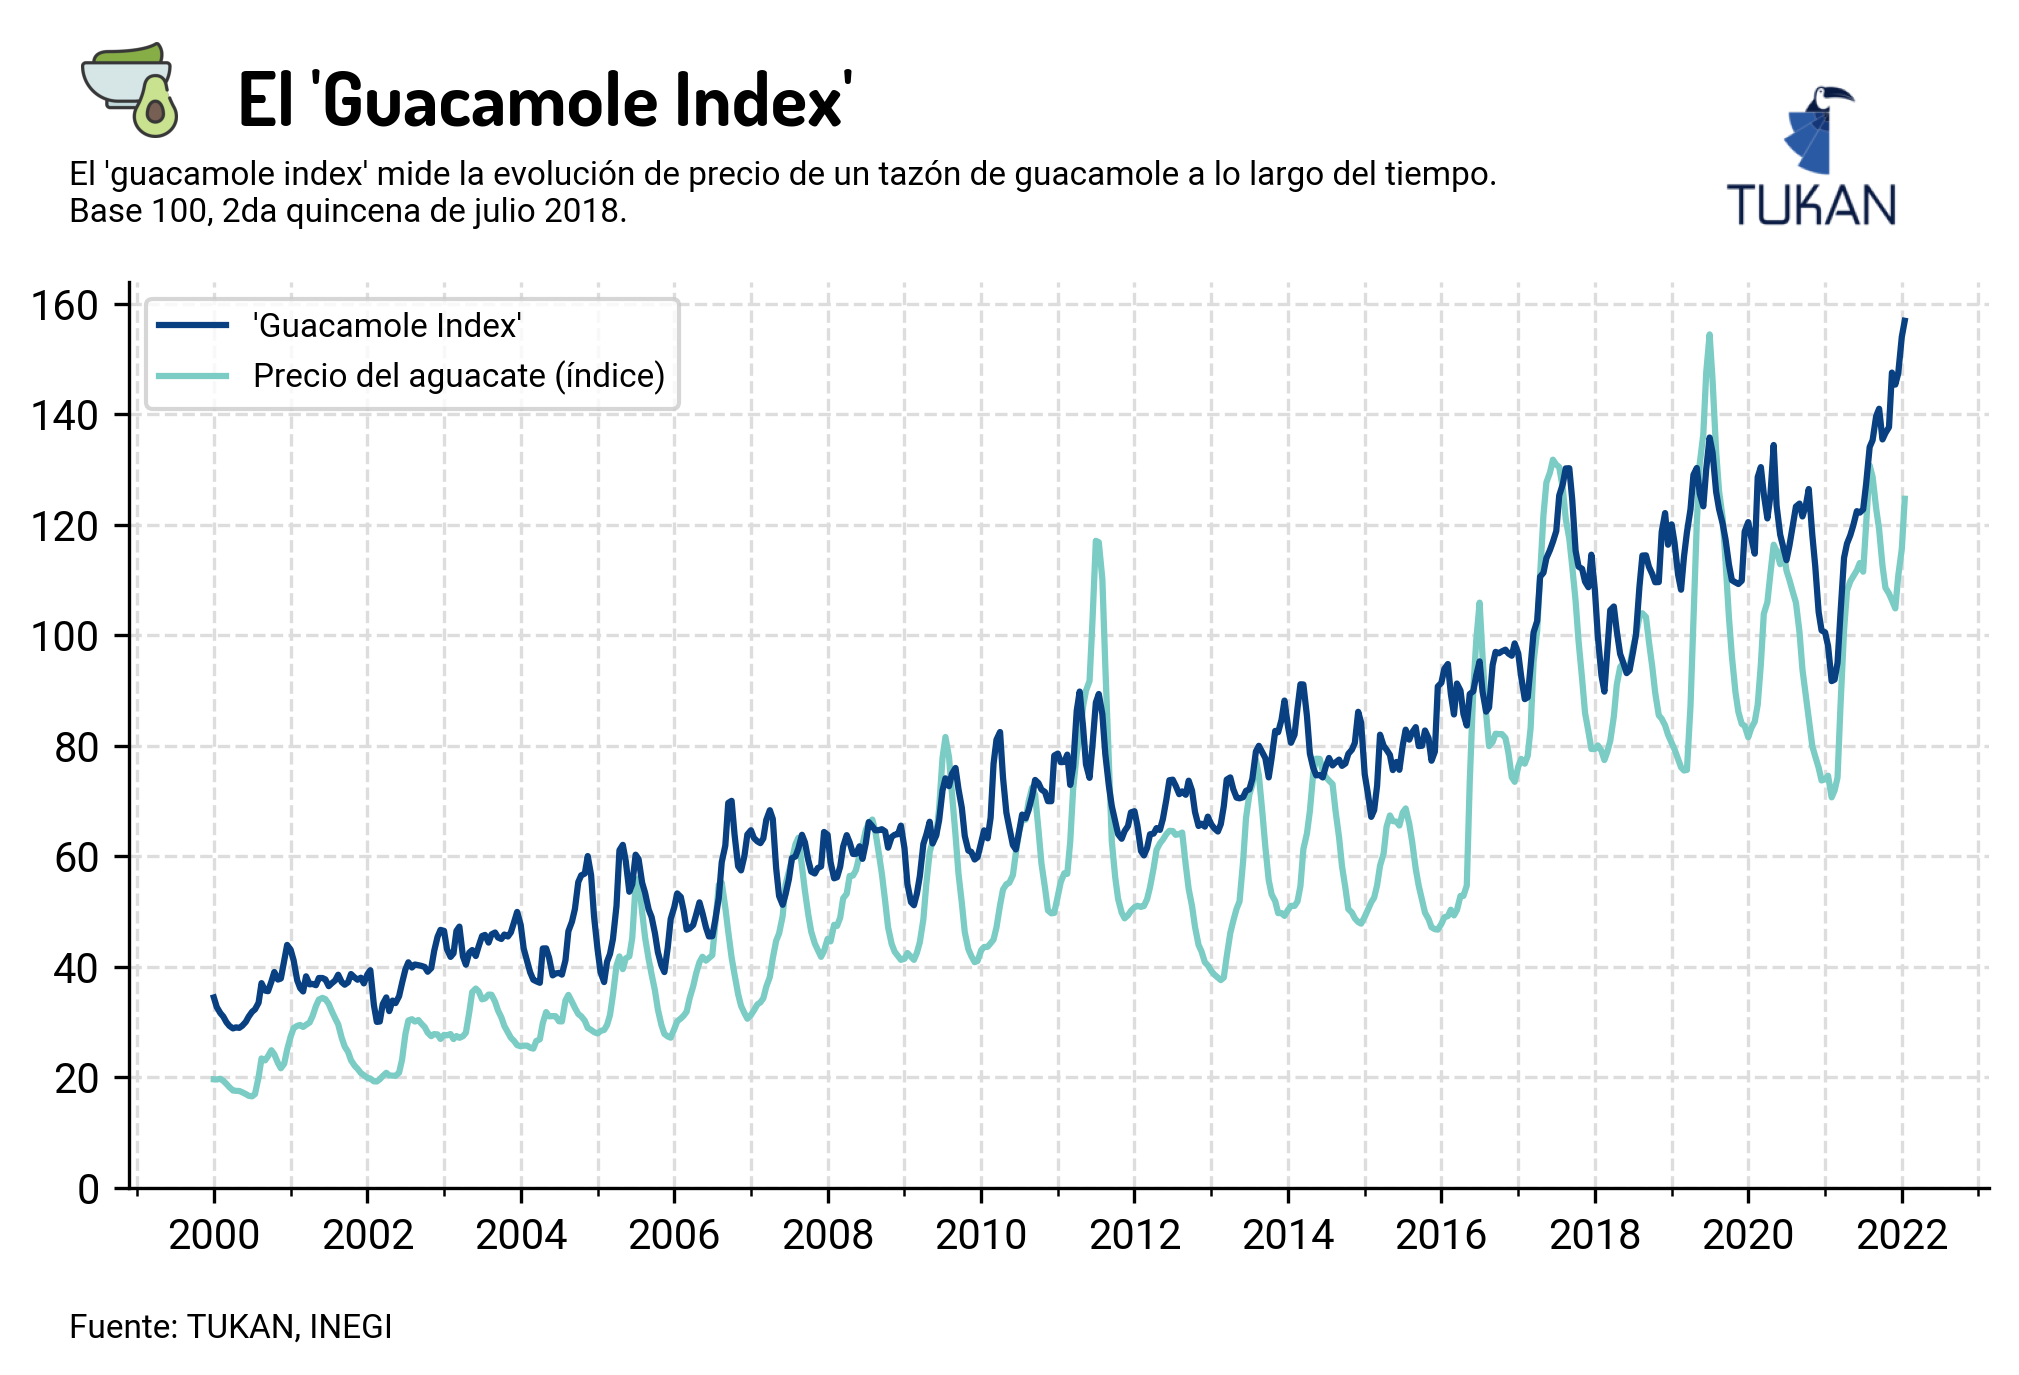

In [37]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
line2, = ax.plot(avocado_data['date'],avocado_data['c572db59b8cd109'], label='Precio del aguacate (índice)', color = cmap(2))
line1, = ax.plot(final_data['date'],final_data['guacamole_index'], label="'Guacamole Index'", color = cmap(0))

ax.legend(handles=[line1, line2], fancybox = True, fontsize = 8, frameon = True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))


ax.set_ylim(0)

guac_icon = image.imread("guacamole.png")
guac_ax = fig.add_axes([0.1, 1, 0.05, 0.08], zorder=1)
guac_ax.imshow(guac_icon)
guac_ax.axis("off")


# Add title and subtitle
fig.text(
    0.17,
    1.01,
    "El 'Guacamole Index'",
    size=18,
    weight = "bold",
    family = "Dosis"
)

fig.text(
    0.1,
    0.93,
    "El 'guacamole index' mide la evolución de precio de un tazón de guacamole a lo largo del tiempo.\nBase 100, 2da quincena de julio 2018.",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/guacamole_index_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/guacamole_index_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/guacamole_index_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Lemonless Guacamole Index

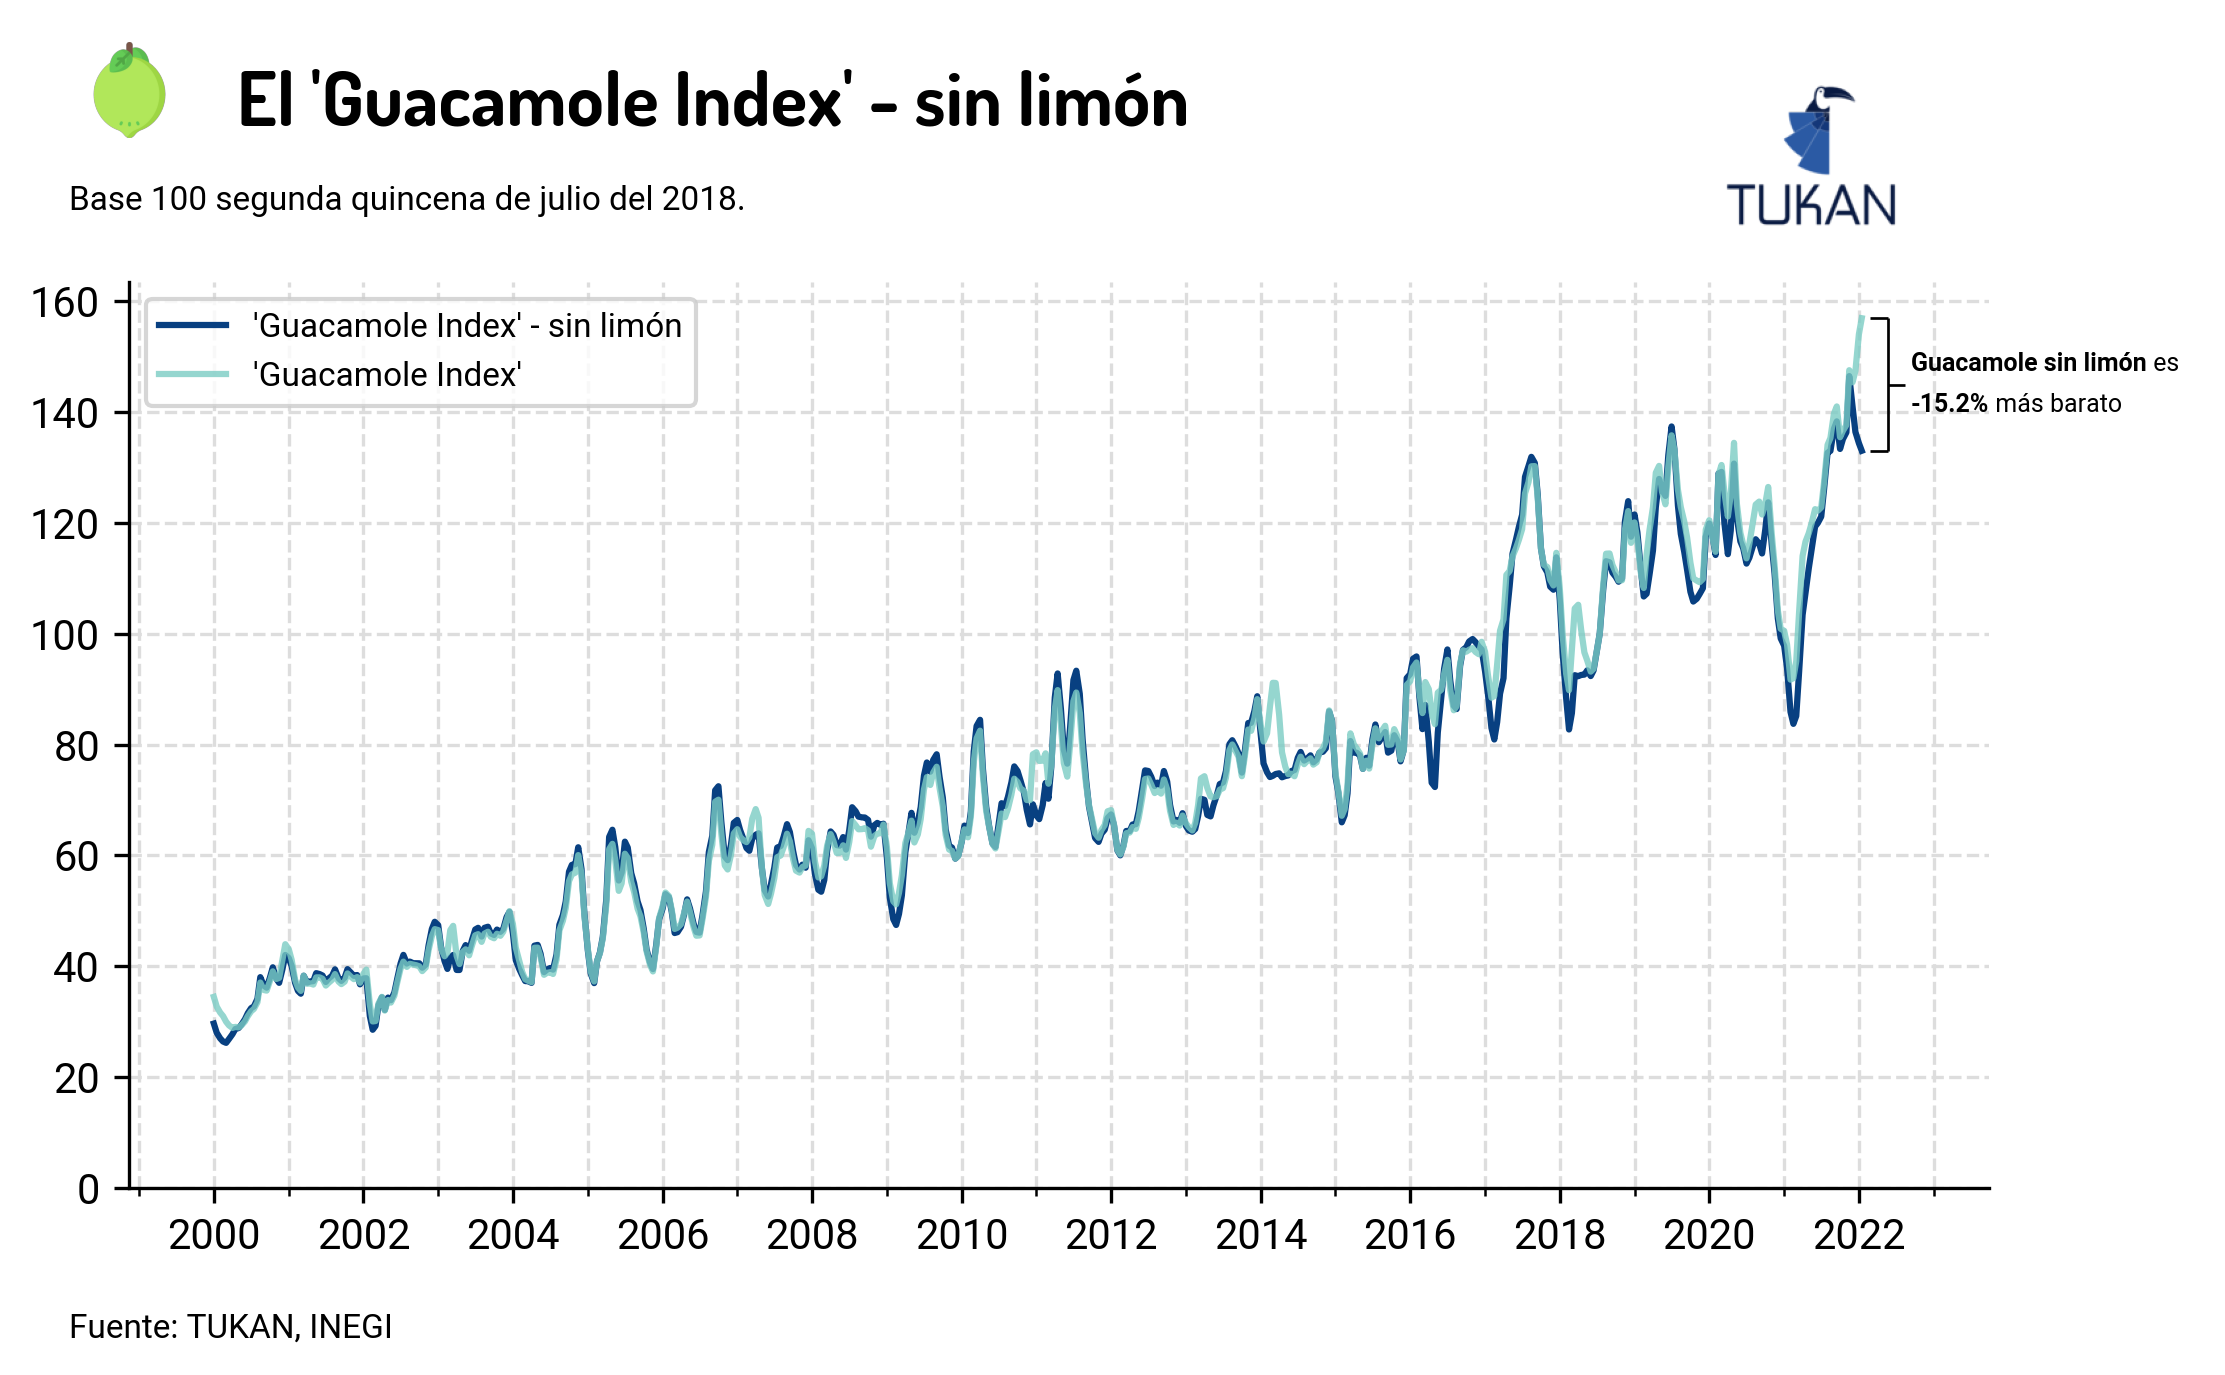

In [67]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

# Data to plot
cmap = mpl.cm.get_cmap("GnBu_r", 5)
cmap_2 = mpl.cm.get_cmap("GnBu_r", 8)

# Data to plot
line1, = ax.plot(final_data['date'],final_data['guacamole_lemonless_index'], label="'Guacamole Index' - sin limón", color = cmap(0))
line2, = ax.plot(final_data['date'],final_data['guacamole_index'], label="'Guacamole Index'", color = cmap(2), alpha = 0.8)

Y_end_1 = final_data["guacamole_lemonless_index"].iloc[-1]
Y_end_2 = final_data["guacamole_index"].iloc[-1]

ax.vlines(final_data["date"].iloc[-1] + timedelta(130), ymin = Y_end_1, ymax = Y_end_2, color = "black", lw = 0.65)
ax.hlines(y = [Y_end_1, Y_end_2], xmin = final_data["date"].iloc[-1] + timedelta(40), xmax=final_data["date"].iloc[-1] + timedelta(130), color = "black", lw = 0.65)

Y_mid = min(Y_end_1, Y_end_2) + abs(Y_end_2 - Y_end_1)/2
ax.hlines(y = [Y_mid], xmin = final_data["date"].iloc[-1] + timedelta(130), xmax= final_data["date"].iloc[-1] + timedelta(210), color = "black", lw = 0.65)


ax_text(
    x = final_data["date"].iloc[-1] + timedelta(240), y = Y_mid,
    s = f"<Guacamole sin limón> es\n<{Y_end_1/Y_end_2 - 1: .1%}> más barato",
    highlight_textprops = [{"weight":"bold"},{"weight":"bold"}],
    ha = "left", va = "center", size = 6
)

ax.legend(handles=[line1, line2], fancybox = True, fontsize = 8, frameon = True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))


ax.set_ylim(0)

guac_icon = image.imread("lime.png")
guac_ax = fig.add_axes([0.1, 1, 0.05, 0.08], zorder=1)
guac_ax.imshow(guac_icon)
guac_ax.axis("off")


# Add title and subtitle
fig.text(
    0.17,
    1.01,
    "El 'Guacamole Index' - sin limón",
    size=18,
    weight = "bold",
    family = "Dosis"
)

fig.text(
    0.1,
    0.94,
    "Base 100 segunda quincena de julio del 2018.",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/lemonless_guacamole_index_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/lemonless_guacamole_index_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/lemonless_guacamole_index_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Compairson between Guacamole Indexes and CPI

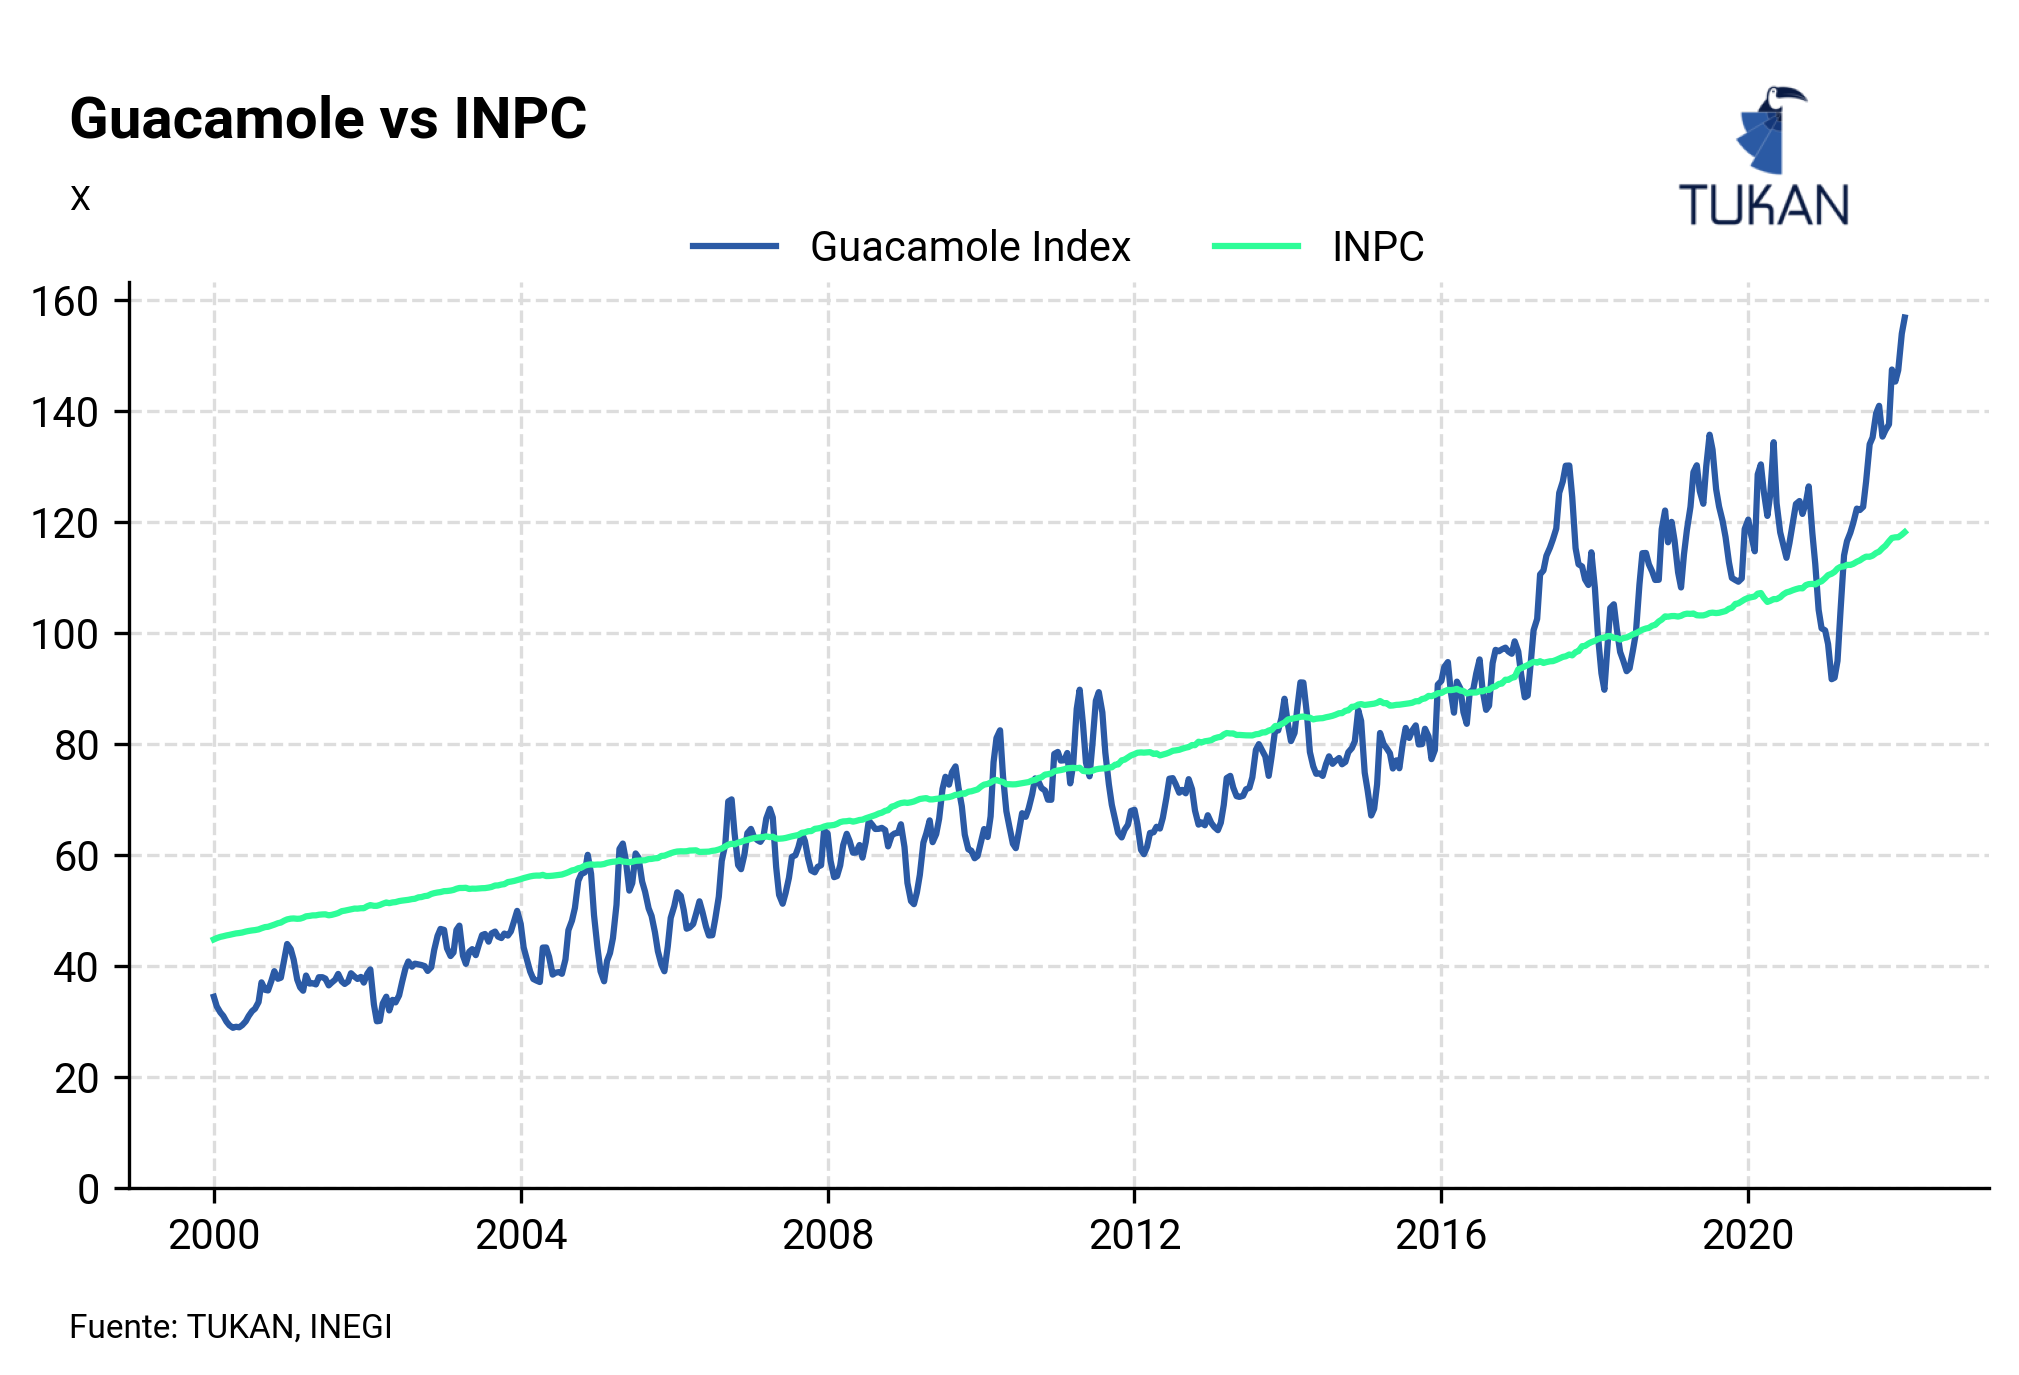

In [573]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

X_min = final_data['date'].min()
X_max = final_data['date'].max()

# Data to plot
line1, = ax.plot(final_data['date'],final_data['guacamole_index'], label='Guacamole Index')
# ax.plot(final_data['date'],final_data['guacamole_lemonless_index'], ls="--")
line2, = ax.plot(final_data['date'],final_data['cpi'], label='INPC')
# ax.hlines(0, X_min, X_max, ls="--", color="black", lw=0.75)

ax.legend(handles=[line1, line2], ncol=2, loc='upper center', bbox_to_anchor=(.5, 1.1))


# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

ax.set_ylim(0)

# plt.xticks(rotation='vertical')

# Set the locator
# locator = mdates.MonthLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')
# ax.xaxis.set_major_locator(locator)
# # Specify formatter
# ax.xaxis.set_major_formatter(fmt)

# Add title and subtitle
fig.text(
    0.1,
    1,
    "Guacamole vs INPC",
    size=14,
    weight = "bold"
)

fig.text(
    0.1,
    0.94,
    "X",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/_guacamole_index_compairson_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.68, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/_guacamole_index_compairson_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/_guacamole_index_compairson_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Index compairson between 2 biweek of january and average of the last 23 biweeks

In [75]:
rolling_data = final_data.drop(columns=['guac_yoy','lemonless_yoy'])

# Rolling Averages
rolling_data['cpi_rolling'] = rolling_data['cpi'].shift().rolling(22).mean()
rolling_data['guacamole_rolling'] = rolling_data['guacamole_index'].shift().rolling(22).mean()
rolling_data['guacamole_lemonless_rolling'] = rolling_data['guacamole_lemonless_index'].shift().rolling(22).mean()

selected_dates = rolling_data[(rolling_data["date"].dt.month == 1) & (rolling_data["date"].dt.day == 15)]
# selected_dates = rolling_data[(rolling_data['date']=='2022-01-15') | (rolling_data['date']=='2021-01-15') | (rolling_data['date']=='2020-01-15')]
# # selected_dates = rolling_data[(rolling_data['date']=='2022-01-15')]

selected_dates.reset_index(inplace=True,drop=True)

# # Mark ups 
selected_dates.loc[:,'cpi_markup'] = (selected_dates['cpi']/selected_dates['cpi_rolling']) -1
selected_dates.loc[:,'guacamole_markup'] = (selected_dates['guacamole_index']/selected_dates['guacamole_rolling']) -1
selected_dates.loc[:,'guacamole_lemonless_markup'] = (selected_dates['guacamole_lemonless_index']/selected_dates['guacamole_lemonless_rolling'])-1
selected_dates.drop(columns=['guacamole_index','guacamole_lemonless_index','guacamole_rolling','guacamole_lemonless_rolling','cpi', 'cpi_rolling'], inplace=True)
selected_dates

C:\Users\migue\AppData\Local\Temp\ipykernel_11768\1110358079.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dates.loc[:,'cpi_markup'] = (selected_dates['cpi']/selected_dates['cpi_rolling']) -1
C:\Users\migue\AppData\Local\Temp\ipykernel_11768\1110358079.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dates.loc[:,'guacamole_markup'] = (selected_dates['guacamole_index']/selected_dates['guacamole_rolling']) -1
C:\Users\migue\AppData\Local\Temp\ipykernel_11768\1110358079.py:17: Sett

,date,cpi_markup,guacamole_markup,guacamole_lemonless_markup
0,2000-01-15,NaN,NaN,NaN
1,2001-01-15,0.039047,0.201271,0.187980
2,2002-01-15,0.027891,0.052767,0.001059
3,2003-01-15,0.026879,0.130436,0.124982
4,2004-01-15,0.026044,-0.038229,-0.081940
5,2005-01-15,0.022398,-0.139440,-0.159258
6,2006-01-15,0.023571,0.057133,0.029749
7,2007-01-15,0.027346,0.151040,0.153709
8,2008-01-15,0.024133,-0.019796,-0.057078
9,2009-01-15,0.032145,-0.122020,-0.176358


In [103]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1%}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            size = 8,
            weight = "bold",
            fontfamily = "Dosis",
            color = cmap(0),
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



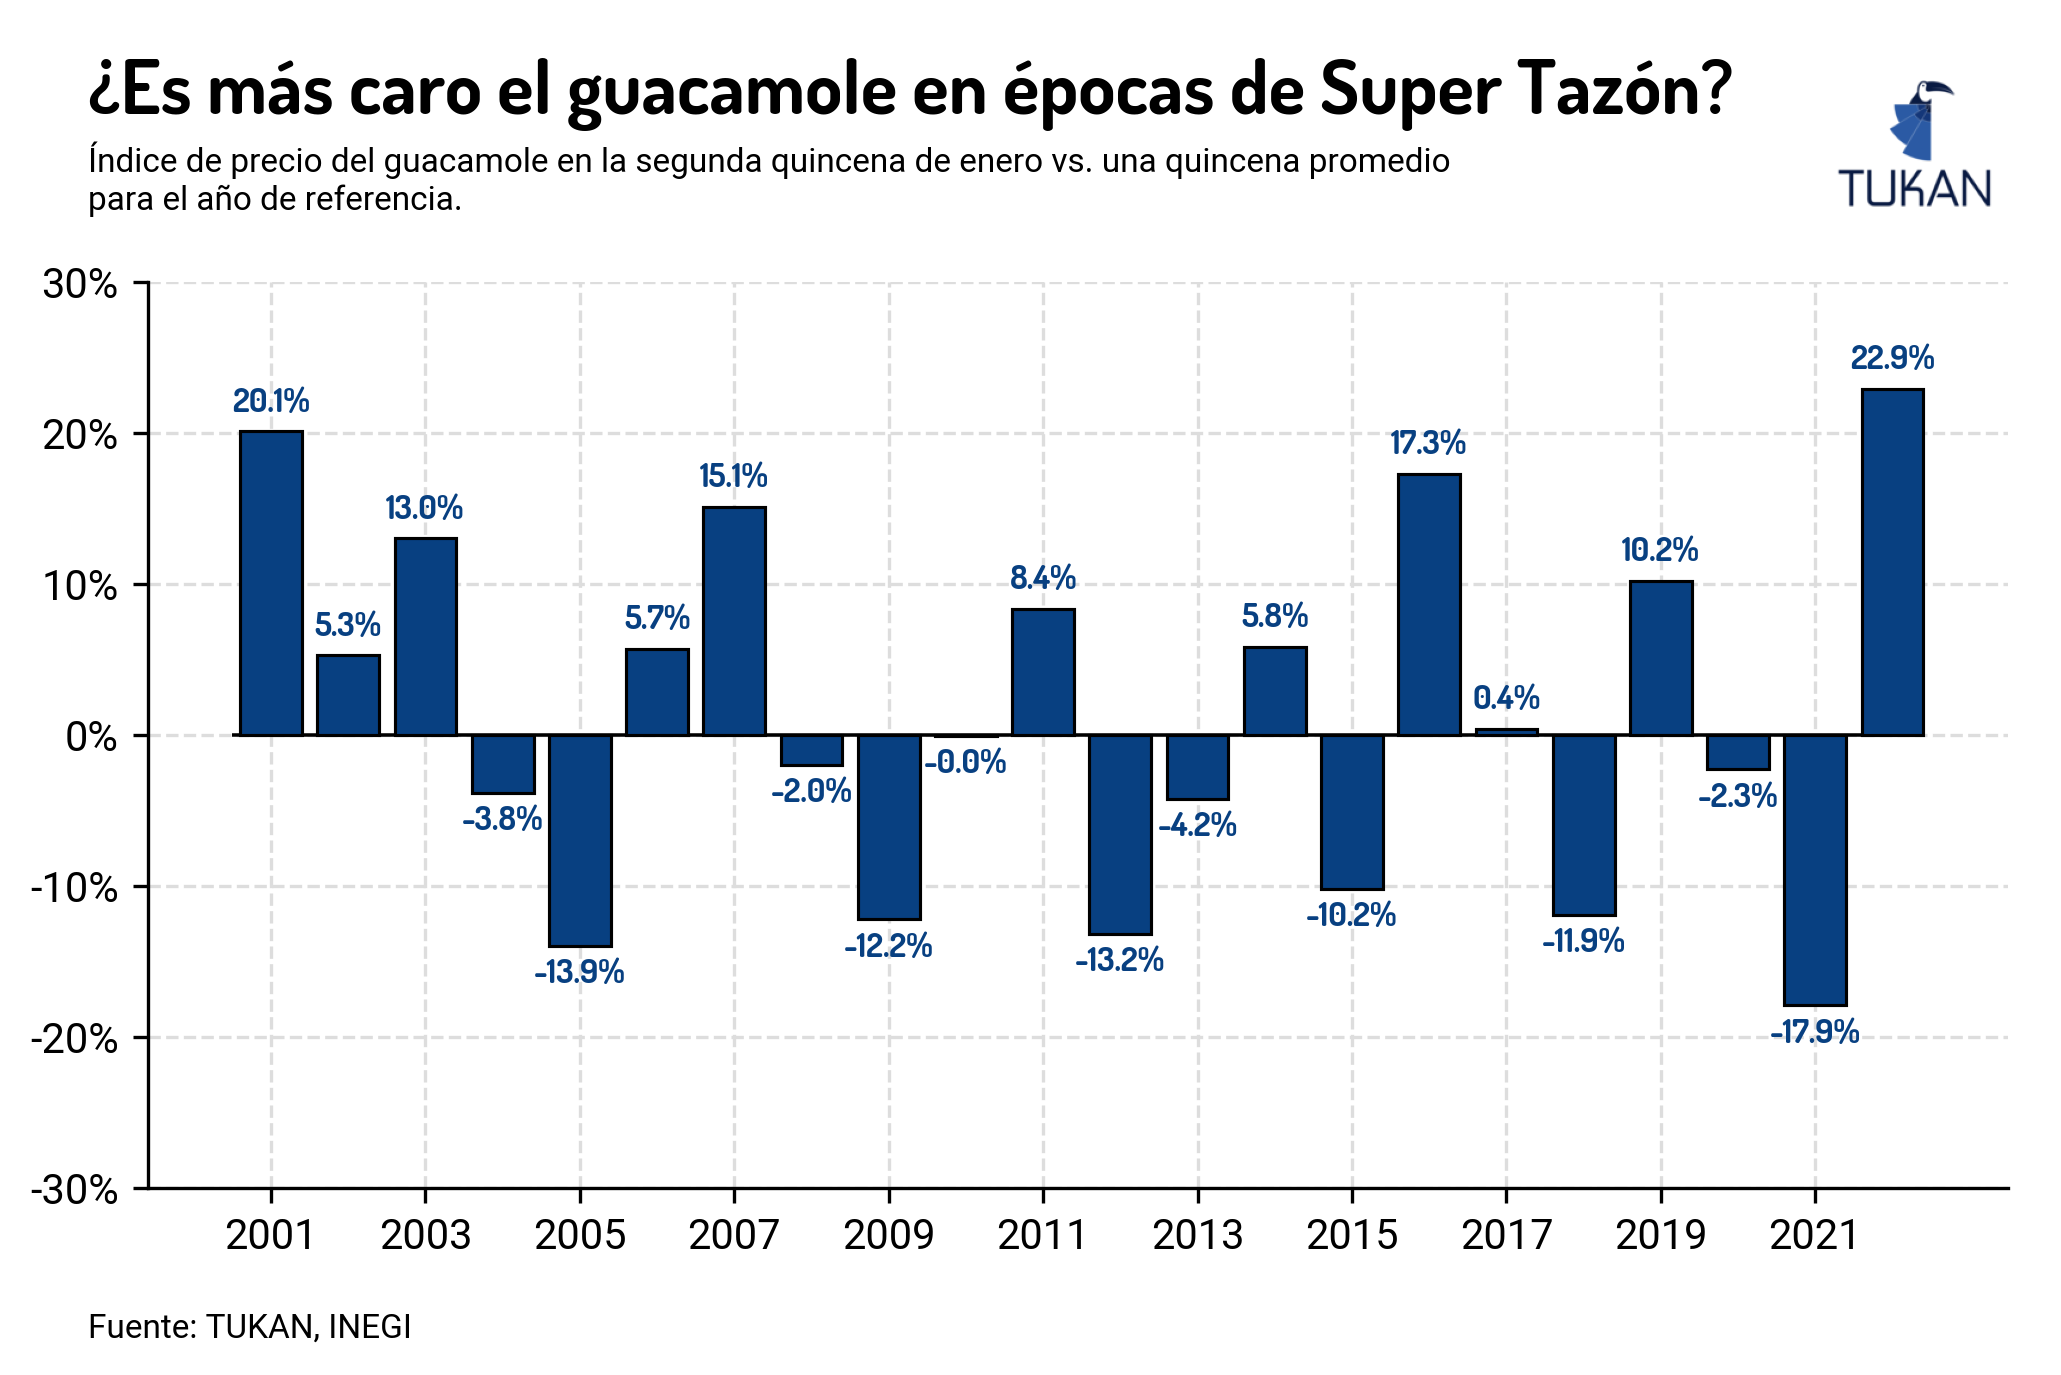

In [139]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

# Data to plot
cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
ax.bar(selected_dates.index, selected_dates['guacamole_markup'], color = cmap(0),
                zorder = 3, ec = "black", lw = 0.75)

add_value_labels(ax, 3)

ax.hlines(y = [0], xmin = 0.5, xmax= 22, color = "black", lw = 0.85)

ax.set_ylim(-.3,.3)
ax.set_xticks([x for x in range(1,23, 2)])
ax.set_xticklabels([x for x in range(2001, 2023, 2)])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0%}'))


ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# # Add gridlines and format to ticks



# # Add title and subtitle
fig.text(
    0.1,
    1.02,
    "¿Es más caro el guacamole en épocas de Super Tazón?",
    size=18,
    weight = "bold",
    family = "Dosis"
)

fig.text(
    0.1,
    0.94,
    "Índice de precio del guacamole en la segunda quincena de enero vs. una quincena promedio\npara el año de referencia.",
    size=8
)

# # Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# # Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/guacamole_premium_index_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.75, .9, 0.16, 0.19], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/guacamole_premium_index_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/guacamole_premium_index_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


## Data Compairson

In [576]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2019-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2019-01-01,103.105,120.084100,0.110603,121.513624,0.146109
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642


In [577]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2020-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2020-01-01,106.388,120.492638,0.003402,119.891204,-0.013352
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642


In [578]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2021-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2021-01-01,109.936,100.524975,-0.165717,97.839571,-0.183930
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642


In [121]:
trends = pd.read_csv("guac_trends.csv")
trends["date"] = pd.to_datetime(trends["date"])

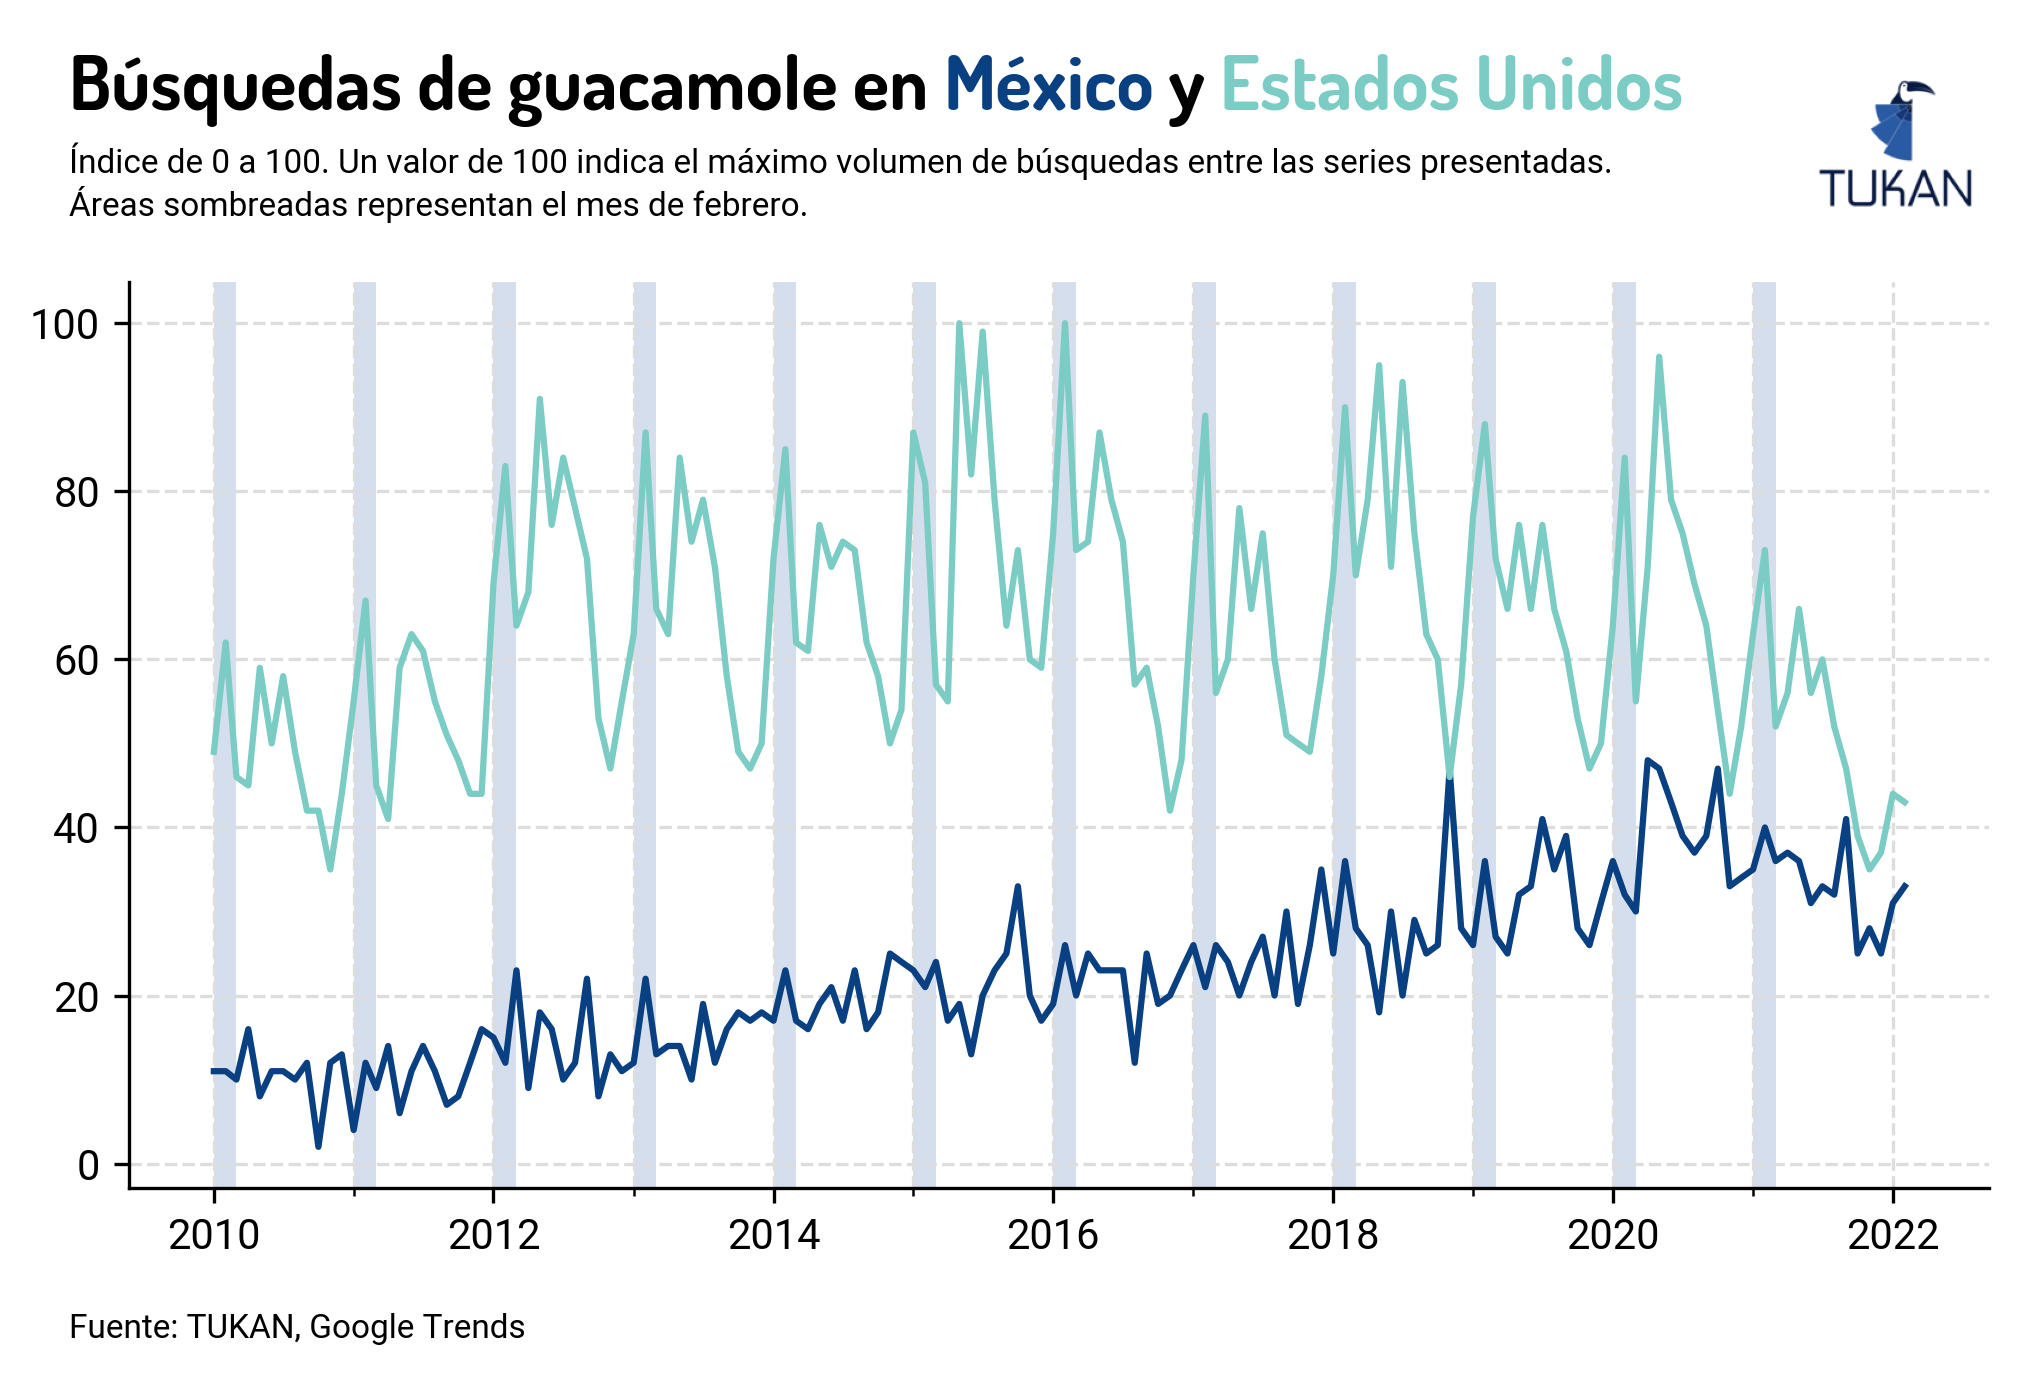

In [144]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

# Data to plot
cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
line1, = ax.plot(trends['date'],trends['mex'], label="México", color = cmap(0))
line2, = ax.plot(trends['date'],trends['usa'], label="E.U.A.", color = cmap(2))

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

febs = [x for x in trends["date"] if x.month == 1]
marchs = [x for x in trends["date"] if x.month == 3]
for feb, march in zip(febs, marchs):
    ax.axvspan(feb, march, facecolor='#2B5AA5', alpha=.2)


fig_text(
    x = 0.1, y = 1.07,
    s = "Búsquedas de guacamole en <México> y <Estados Unidos>",
    highlight_textprops=[{"color":cmap(0)}, {"color":cmap(2)}],
    size=18,
    weight = "bold",
    family = "Dosis"
)


fig.text(
    0.1,
    0.935,
    "Índice de 0 a 100. Un valor de 100 indica el máximo volumen de búsquedas entre las series presentadas.\nÁreas sombreadas representan el mes de febrero.",
    size=8
)

# # Add footer
fig.text(0.1, -0, "Fuente: TUKAN, Google Trends", fontsize=8)

# # Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/trends_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.75, .9, 0.16, 0.19], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")


plt.savefig(
    "plots/trends_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/trends_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)